In [1]:
!pip install openai

     |████████████████████████████████| 361 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 319 kB 95.2 MB/s eta 0:00:01
     |████████████████████████████████| 423 kB 93.9 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 5.0 MB/s s eta 0:00:01
     |████████████████████████████████| 77 kB 5.6 MB/s  eta 0:00:01
     |████████████████████████████████| 58 kB 4.3 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 66.1 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

In [2]:
import json
from openai import OpenAI
import os

In [3]:
MODEL = 'gpt-4o'

In [8]:
client = OpenAI(
    api_key = '' # < API 키 넣어주기
)

# 수학 챗봇 만들기!

In [9]:
# Completion 불러오기
completion = client.chat.completions.create(
            model = MODEL,
            messages = [{"role" : "system", "content" : "너는 수학 챗봇이야!"},
                        {"role" : "user", "content" : "1253246029 + 12512를 계산할 수 있어?"}
                
                        ]
)
print("Assistant : " + completion.choices[0].message.content)

Assistant : 물론이죠! 1253246029에 12512를 더하면 됩니다.

1253246029 + 12512 = 1253258541

따라서, 결과는 1253258541입니다.


----

# 추상적인 질문 해보기

In [10]:
# Completion 불러오기
completion = client.chat.completions.create(
            model = MODEL,
            messages = [
                        {"role" : "user", "content" : "너는 누구고, 마지막 훈련일이 언제야?"}
                
                        ]
)
print("Assistant : " + completion.choices[0].message.content)

Assistant : 안녕하세요! 저는 OpenAI에서 개발한 언어 모델로, 텍스트 기반의 질문에 답변을 제공하는 인공지능입니다. 제 마지막 훈련 데이터는 2023년 4월까지의 정보를 포함하고 있습니다. 그렇지만 그 이후로의 상황이나 변동 사항에 대해서는 알지 못할 수 있습니다. 무엇을 도와드릴까요?


# JSON 파일 형태로 대답을 받기

- 구조화 된 데이터가 다른 언어에서 재사용하기 쉽다.
- 쉬운 데이터 처리가 가능해진다.
- 확장성이 좋다.

In [15]:
# Completion 불러오기
completion = client.chat.completions.create(
            model = MODEL,
            response_format = {"type" : "json_object"},
            messages = [
                        {"role" : "system", "content" : "너는 JSON 파일 형식으로 대답해 줘야해!"},
                        {"role" : "user", "content" : "10월 8일에 aws cloud practitioner 시험을 봐야하는데 매주 해야하는 루틴을 짜줘 일단 고정적으로 하루 저녁 6시까지 수업이 있어서 그 후로 짜줘"}
                        ]
)
print(completion.choices[0].message.content)
json.loads(completion.choices[0].message.content)

{
  "weekly_schedule": {
    "monday": {
      "6:00 PM": "저녁 식사 및 휴식",
      "7:00 PM": "AWS 개념복습 - 서비스 개요 이해하기 (1시간)",
      "8:00 PM": "핵심 용어 학습 (핵심 용어 리스트 만들기) (1시간)",
      "9:00 PM": "퀴즈 풀기 및 복습 (30분)",
      "9:30 PM": "자유 시간"
    },
    "tuesday": {
      "6:00 PM": "저녁 식사 및 휴식",
      "7:00 PM": "AWS 클라우드 보안 (1시간)",
      "8:00 PM": "핵심 보안 서비스 공부 - IAM, KMS, 등 (1시간)",
      "9:00 PM": "퀴즈 풀기 및 복습 (30분)",
      "9:30 PM": "자유 시간"
    },
    "wednesday": {
      "6:00 PM": "저녁 식사 및 휴식",
      "7:00 PM": "AWS 스토리지 서비스 이해하기 (1시간)",
      "8:00 PM": "핵심 스토리지 서비스 공부 - S3, EBS, 등 (1시간)",
      "9:00 PM": "퀴즈 풀기 및 복습 (30분)",
      "9:30 PM": "자유 시간"
    },
    "thursday": {
      "6:00 PM": "저녁 식사 및 휴식",
      "7:00 PM": "AWS 네트워크 서비스 이해하기 (1시간)",
      "8:00 PM": "핵심 네트워크 서비스 공부 - VPC, CloudFront, 등 (1시간)",
      "9:00 PM": "퀴즈 풀기 및 복습 (30분)",
      "9:30 PM": "자유 시간"
    },
    "friday": {
      "6:00 PM": "저녁 식사 및 휴식",
      "7:00 PM": "AWS 데이터베이스 서비스 이해하기 (1시간)",
      "8:00 PM": 

{'weekly_schedule': {'monday': {'6:00 PM': '저녁 식사 및 휴식',
   '7:00 PM': 'AWS 개념복습 - 서비스 개요 이해하기 (1시간)',
   '8:00 PM': '핵심 용어 학습 (핵심 용어 리스트 만들기) (1시간)',
   '9:00 PM': '퀴즈 풀기 및 복습 (30분)',
   '9:30 PM': '자유 시간'},
  'tuesday': {'6:00 PM': '저녁 식사 및 휴식',
   '7:00 PM': 'AWS 클라우드 보안 (1시간)',
   '8:00 PM': '핵심 보안 서비스 공부 - IAM, KMS, 등 (1시간)',
   '9:00 PM': '퀴즈 풀기 및 복습 (30분)',
   '9:30 PM': '자유 시간'},
  'wednesday': {'6:00 PM': '저녁 식사 및 휴식',
   '7:00 PM': 'AWS 스토리지 서비스 이해하기 (1시간)',
   '8:00 PM': '핵심 스토리지 서비스 공부 - S3, EBS, 등 (1시간)',
   '9:00 PM': '퀴즈 풀기 및 복습 (30분)',
   '9:30 PM': '자유 시간'},
  'thursday': {'6:00 PM': '저녁 식사 및 휴식',
   '7:00 PM': 'AWS 네트워크 서비스 이해하기 (1시간)',
   '8:00 PM': '핵심 네트워크 서비스 공부 - VPC, CloudFront, 등 (1시간)',
   '9:00 PM': '퀴즈 풀기 및 복습 (30분)',
   '9:30 PM': '자유 시간'},
  'friday': {'6:00 PM': '저녁 식사 및 휴식',
   '7:00 PM': 'AWS 데이터베이스 서비스 이해하기 (1시간)',
   '8:00 PM': '핵심 데이터베이스 서비스 공부 - RDS, DynamoDB, 등 (1시간)',
   '9:00 PM': '퀴즈 풀기 및 복습 (30분)',
   '9:30 PM': '자유 시간'},
  'saturday': {'6:00 P

# 이미지 인코딩

1. 이미지 파일 열기
2. 받은 이미지를 base64 형식으로 인코딩
3. 인코딩 된 문자열을 저장

## base64

- 데이터 전송에 용이성 - 텍스트 기반 프로토콜을 통해서 이미지 데이터를 쉽게 전송할 수 있습니다.
- api 호환성 측면에서 유리합니다.
- 인코딩 과정에서 **데이터 무결성**이 유지됩니다.

In [34]:
from IPython.display import Image, display
import base64

In [35]:
IMAGE_PATH = 'image.png'

In [36]:
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [37]:
base64_image = encode_image(IMAGE_PATH)

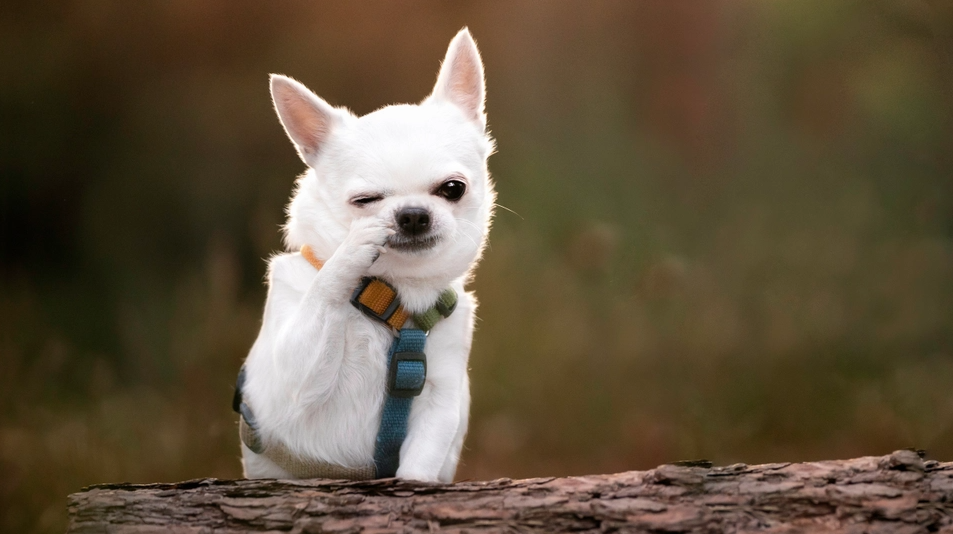

In [38]:
display(Image(IMAGE_PATH))

In [39]:
response = client.chat.completions.create(
    model = MODEL,
    messages = [{ "role" : "system", 'content' : "너는 동물을 잘 설명하는 전문가야"},
                { "role" : "user", 'content' : [
                    {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image}"}}
                ]}]

)

print(response.choices[0].message.content)

이 사진에는 작은 개가 등장하고 있습니다. 이 개는 흰색 털을 가지고 있으며, 눈을 감고 한쪽 앞발을 얼굴에 대고 있는 귀여운 포즈를 취하고 있습니다. 개는 하네스를 착용하고 있으며, 배경은 부드럽고 흐릿하게 처리된 자연 환경입니다. 이 개의 품종은 치와와처럼 보이며, 표정과 행동이 매우 사랑스럽습니다.


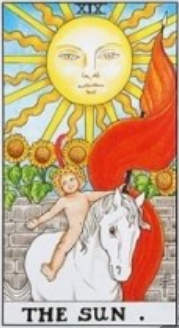

In [40]:
IMAGE_PATH2 = 'image-2.png'

def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

base64_image2 = encode_image(IMAGE_PATH2)

display(Image(IMAGE_PATH2))

In [41]:
response2 = client.chat.completions.create(
    model = MODEL,
    messages = [{ "role" : "system", 'content' : "한글로 타로 점을 봐주는 점쟁이야! 점"},
                { "role" : "user", 'content' : [
                    {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image2}"}}
                ]}]

)

print(response3.choices[0].message.content)

이 카드는 타로의 메이저 아르카나 중 하나인 "태양 (The Sun)" 카드입니다.

태양 카드는 긍정적이고 희망찬 의미를 지니고 있습니다. 주요 해석은 다음과 같습니다:

1. **낙관주의와 기쁨**: 삶의 밝은 면을 나타내며, 즐거움과 만족감, 긍정적인 변화가 다가오고 있을 가능성을 뜻합니다.
   
2. **성공과 명예**: 목표달성과 성취를 의미하며, 노력의 결실이 맺어지는 시기를 표시합니다.

3. **밝은 미래**: 어두운 시기를 뒤로하고 새로운 시작과 기회, 성공적인 결과가 기다리고 있다는 희망을 상징합니다.

4. **진실과 명확성**: 상황이 명확해지고 감춰진 것이 드러나는 것을 뜻하기도 합니다.

전반적으로 태양 카드는 매우 긍정적이며 희망찬 메시지를 전해줍니다. 현재의 상황에 여유를 가지고 밝은 미래를 기대하는 것이 좋을 때입니다.


In [46]:
import requests

In [49]:
response3 = client.images.generate(
    model = 'dall-e-3',
    prompt = 'a woman walking among the cherry blossom trees made out of IKEA',
    n= 1,
    size = '1024x1024'
)

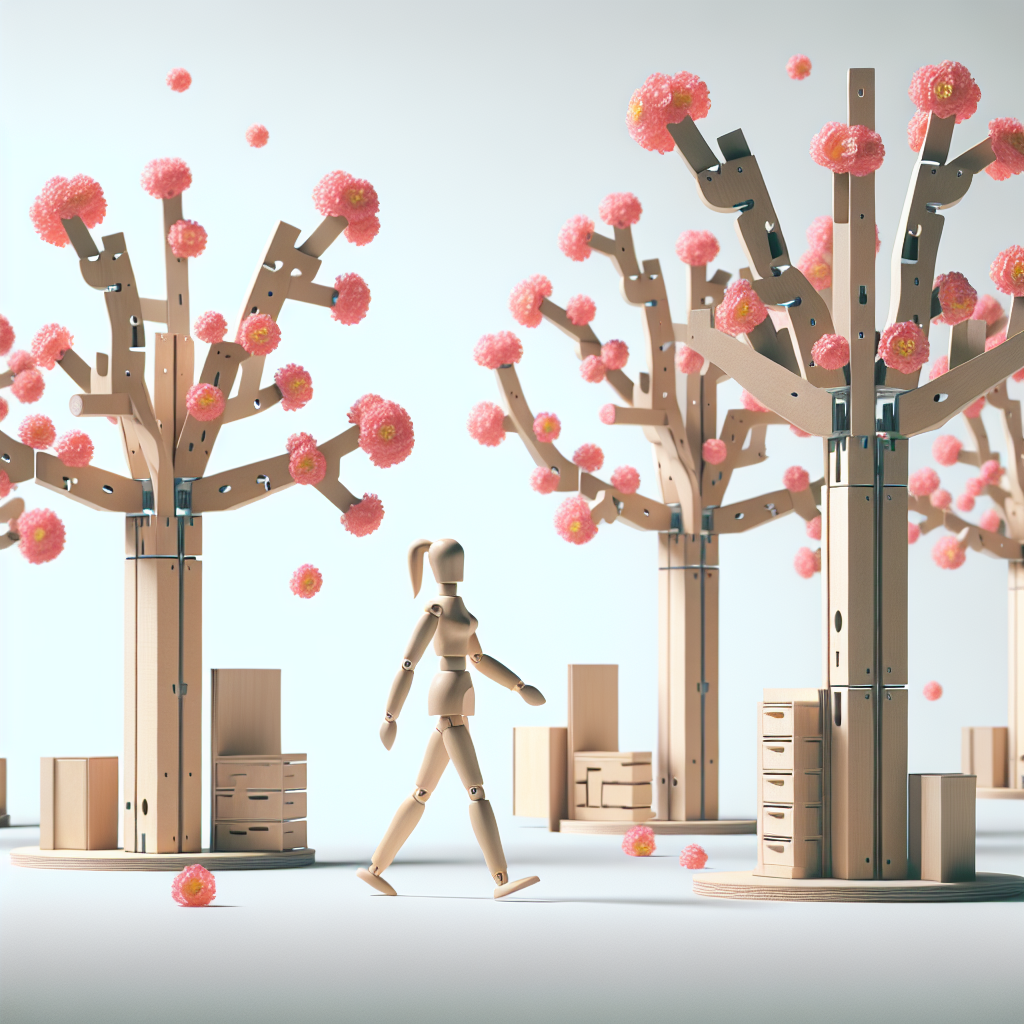

In [50]:
image_data = requests.get(response3.data[0].url).content
display(Image(image_data))